# Twitter EDA

### Import Dependencies

In [1]:
import pandas as pd
import re
import string
from textblob import TextBlob
import matplotlib.pyplot as plt

import pickle # just in case

### Set file locations

In [2]:
# Raw data file for tweet text (input file)
tweet_text_file = '../00_data/twitter_data/twitter_text.csv'

# File for cleaned tweet text (input file)
clean_csv = '../00_data/twitter_data/twitter_data_cleaned.csv'

# File for cleaned tweet text (input file)
cleantext_csv = '../00_data/twitter_data/twitter_cleantext.csv'

### Read in the data

In [3]:
df = pd.read_csv(cleantext_csv)

In [4]:
df.head()

,tweet_id,full_text,clean_text
0,1.364223e+18,Here’s what's in the COVID relief package:\n \...,here’s whats in the covid relief package direc...
1,1.364381e+18,Will the National Endowment for the Arts be he...,will the national endowment for the arts be he...
2,1.364610e+18,"This is both anecdotal and early, but many lon...",this is both anecdotal and early but many long...
3,1.364727e+18,A Link to Professor Chossudovsky’s Analysis of...,a link to professor chossudovsky’s analysis of...
4,1.364727e+18,Children warned over hugging grandparents even...,children warned over hugging grandparents even...


In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51157 entries, 0 to 51156
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    51157 non-null  float64
 1   full_text   51157 non-null  object 
 2   clean_text  51136 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.2+ MB


In [6]:
df.fillna(value=' ', inplace=True)

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51157 entries, 0 to 51156
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    51157 non-null  float64
 1   full_text   51157 non-null  object 
 2   clean_text  51157 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.2+ MB


### Sentiment analysis (by tweet)

In [8]:
# This takes a little while (<2 minutes)

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['clean_text'].apply(pol)
df['subjectivity'] = df['clean_text'].apply(sub)
df

,tweet_id,full_text,clean_text,polarity,subjectivity
0,1.364223e+18,Here’s what's in the COVID relief package:\n \...,here’s whats in the covid relief package direc...,0.233333,0.766667
1,1.364381e+18,Will the National Endowment for the Arts be he...,will the national endowment for the arts be he...,0.000000,0.500000
2,1.364610e+18,"This is both anecdotal and early, but many lon...",this is both anecdotal and early but many long...,0.333333,0.480556
3,1.364727e+18,A Link to Professor Chossudovsky’s Analysis of...,a link to professor chossudovsky’s analysis of...,0.200000,0.200000
4,1.364727e+18,Children warned over hugging grandparents even...,children warned over hugging grandparents even...,0.007000,0.541000
...,...,...,...,...,...
51152,1.366553e+18,EU - GERMANY ....and the beat goes on.... Wher...,eu germany and the beat goes on where are the ...,-0.250000,0.250000
51153,1.366549e+18,@satyendrajain @ArvindKejriwal @DrKKAggarwal ...,vaccination of frontline officers is being del...,-0.031818,0.277273
51154,1.366547e+18,Do it the Coward and Liar way. Get vaccinated ...,do it the coward and liar way get vaccinated a...,0.000000,0.000000
51155,1.366544e+18,Trump urges supporters to get vaccinated again...,trump urges supporters to get vaccinated again...,0.000000,0.000000


array([[<AxesSubplot:title={'center':'polarity'}>]], dtype=object)

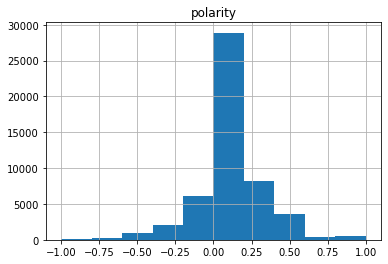

In [9]:
df.hist(column = 'polarity')

array([[<AxesSubplot:title={'center':'subjectivity'}>]], dtype=object)

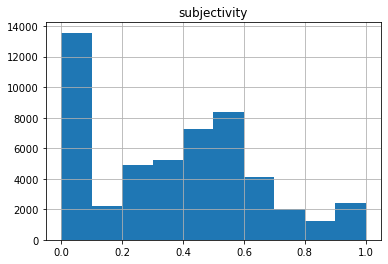

In [10]:
df.hist(column = 'subjectivity')

<AxesSubplot:xlabel='subjectivity', ylabel='polarity'>

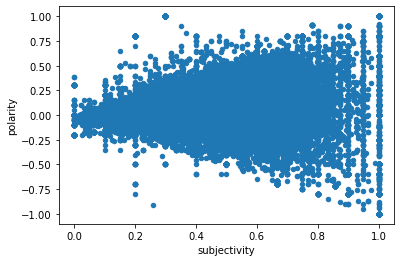

In [11]:
df.plot.scatter(x='subjectivity', y='polarity')

In [12]:
df.drop('full_text', axis=1, inplace=True)

In [13]:
new_df = pd.read_csv(clean_csv)

In [14]:
new_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51157 entries, 0 to 51156
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            51157 non-null  float64
 1   created_at          51157 non-null  object 
 2   full_text           51157 non-null  object 
 3   geo                 77 non-null     object 
 4   coordinates         77 non-null     object 
 5   place               1005 non-null   object 
 6   retweet_count       51157 non-null  int64  
 7   favorite_count      51157 non-null  int64  
 8   possibly_sensitive  51157 non-null  object 
 9   lang                51157 non-null  object 
 10  user_id             51157 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 4.3+ MB


In [15]:
# lost the datetime format in csv. Fix that
# new_df['created_at_datetime'] = pd.to_datetime(new_df['created_at_datetime'])

In [16]:
new_df = new_df.merge(df, how='left', on='tweet_id')

In [17]:
new_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51165 entries, 0 to 51164
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            51165 non-null  float64
 1   created_at          51165 non-null  object 
 2   full_text           51165 non-null  object 
 3   geo                 77 non-null     object 
 4   coordinates         77 non-null     object 
 5   place               1005 non-null   object 
 6   retweet_count       51165 non-null  int64  
 7   favorite_count      51165 non-null  int64  
 8   possibly_sensitive  51165 non-null  object 
 9   lang                51165 non-null  object 
 10  user_id             51165 non-null  float64
 11  clean_text          51165 non-null  object 
 12  polarity            51165 non-null  float64
 13  subjectivity        51165 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 5.9+ MB


array([[<AxesSubplot:title={'center':'retweet_count'}>]], dtype=object)

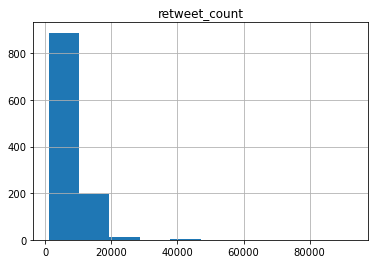

In [18]:
new_df.loc[new_df['retweet_count'] > 1000].hist(column = 'retweet_count')

array([[<AxesSubplot:title={'center':'favorite_count'}>]], dtype=object)

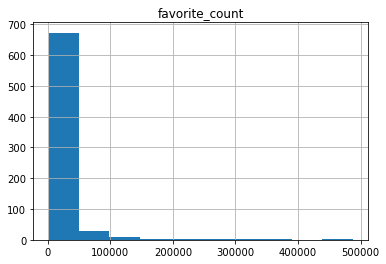

In [19]:
new_df.loc[new_df['favorite_count'] > 1000].hist(column = 'favorite_count')

<AxesSubplot:xlabel='subjectivity', ylabel='retweet_count'>

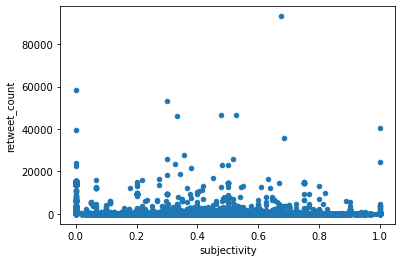

In [20]:
new_df.plot.scatter(x='subjectivity', y='retweet_count')

<AxesSubplot:xlabel='subjectivity', ylabel='retweet_count'>

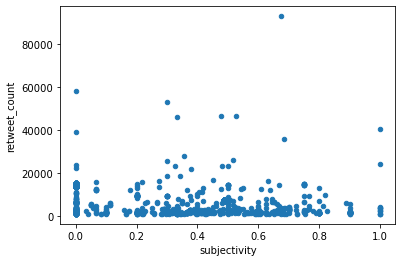

In [21]:
new_df.loc[new_df['retweet_count'] > 1000].plot.scatter(x='subjectivity', y='retweet_count')

<AxesSubplot:xlabel='polarity', ylabel='retweet_count'>

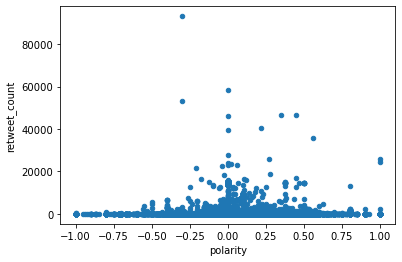

In [22]:
new_df.plot.scatter(x='polarity', y='retweet_count')

<AxesSubplot:xlabel='subjectivity', ylabel='favorite_count'>

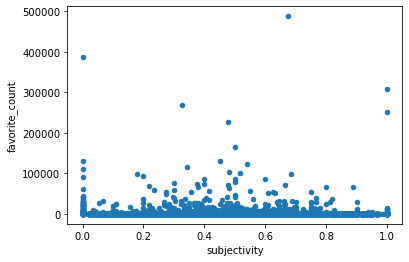

In [23]:
new_df.plot.scatter(x='subjectivity', y='favorite_count')

<AxesSubplot:xlabel='polarity', ylabel='favorite_count'>

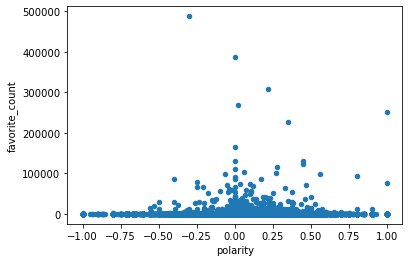

In [24]:
new_df.plot.scatter(x='polarity', y='favorite_count')

<AxesSubplot:xlabel='retweet_count', ylabel='favorite_count'>

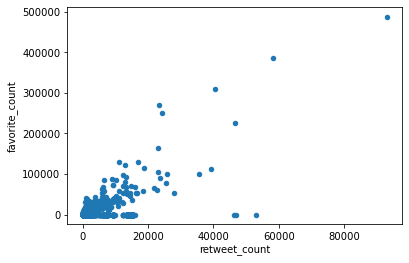

In [25]:
new_df.plot.scatter(x='retweet_count', y='favorite_count')

<AxesSubplot:xlabel='subjectivity', ylabel='polarity'>

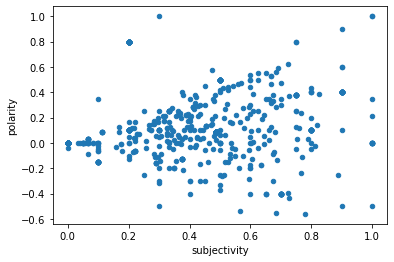

In [26]:
new_df.loc[new_df['retweet_count'] > 1000].plot.scatter(x='subjectivity', y='polarity')

### Sentiment analysis (by user_id)

In [27]:
new_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51165 entries, 0 to 51164
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            51165 non-null  float64
 1   created_at          51165 non-null  object 
 2   full_text           51165 non-null  object 
 3   geo                 77 non-null     object 
 4   coordinates         77 non-null     object 
 5   place               1005 non-null   object 
 6   retweet_count       51165 non-null  int64  
 7   favorite_count      51165 non-null  int64  
 8   possibly_sensitive  51165 non-null  object 
 9   lang                51165 non-null  object 
 10  user_id             51165 non-null  float64
 11  clean_text          51165 non-null  object 
 12  polarity            51165 non-null  float64
 13  subjectivity        51165 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 5.9+ MB


In [28]:
grouping_df = new_df[['user_id', 'clean_text']].copy()

In [29]:
grouping_df['clean_text'] = new_df[['user_id', 'clean_text']].groupby('user_id')['clean_text'].transform(lambda x: ','.join(x))
grouping_df.drop_duplicates(inplace=True)

In [30]:
grouping_df.reset_index(drop=True, inplace=True)

In [31]:
grouping_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     37010 non-null  float64
 1   clean_text  37010 non-null  object 
dtypes: float64(1), object(1)
memory usage: 578.4+ KB


In [32]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

grouping_df['polarity'] = grouping_df['clean_text'].apply(pol)
grouping_df['subjectivity'] = grouping_df['clean_text'].apply(sub)
grouping_df

,user_id,clean_text,polarity,subjectivity
0,2.950125e+07,here’s whats in the covid relief package direc...,0.233333,0.766667
1,1.201671e+18,will the national endowment for the arts be he...,-0.062500,0.337500
2,3.842872e+07,this is both anecdotal and early but many long...,0.333333,0.480556
3,2.192010e+09,a link to professor chossudovsky’s analysis of...,0.400000,0.600000
4,2.868190e+09,children warned over hugging grandparents even...,-0.008426,0.505648
...,...,...,...,...
37005,7.790395e+07,my father anoop chand gupta 92 years vaccinate...,0.150000,0.450000
37006,7.250928e+17,eu germany and the beat goes on where are the ...,-0.250000,0.250000
37007,3.052016e+09,vaccination of frontline officers is being del...,-0.031818,0.277273
37008,1.324768e+18,do it the coward and liar way get vaccinated a...,0.000000,0.000000


In [33]:
top_retweeted_users = list(new_df.nlargest(20, 'retweet_count')['user_id'])

In [34]:
top_retweeted_users

[84279963.0,
 138203134.0,
 1.3588168932394926e+18,
 1.2941205574163456e+18,
 18839785.0,
 1128905647.0,
 84279963.0,
 8.164122334880154e+17,
 17243213.0,
 222680234.0,
 33537967.0,
 27133902.0,
 44196397.0,
 1.02223953862903e+18,
 44196397.0,
 105707045.0,
 31012378.0,
 112359744.0,
 18703437.0,
 15764349.0]

In [35]:
graphing_df = grouping_df[grouping_df['user_id'].isin(top_retweeted_users)]
graphing_df.reset_index(drop=True, inplace=True)

In [36]:
graphing_df

,user_id,clean_text,polarity,subjectivity
0,3.353797e+07,from the beginning of this crisis healthcare w...,0.112302,0.356746
1,2.713390e+07,also dropped the best album during this pandem...,1.000000,0.300000
2,1.883978e+07,took my first dose of the covid19 vaccine at a...,0.346667,0.476667
3,8.427996e+07,hope everyone is alright had my wisdom teeth o...,-0.370833,0.775000
4,1.128906e+09,here i describe a brief overview of how the pf...,0.000000,0.333333
5,1.576435e+07,if you are eligible for the vaccine please go ...,0.275000,0.341667
6,1.358817e+18,i think covid’s biggest lesson is that a lot o...,-0.300000,0.300000
7,1.870344e+07,company goals set for vaccines pfizer 14 milli...,-0.209722,0.379167
8,1.123597e+08,a german radio presenter equating the south ko...,-0.040000,0.000000
9,2.226802e+08,there’s already an epidemic of hatred towards ...,0.045000,0.383274


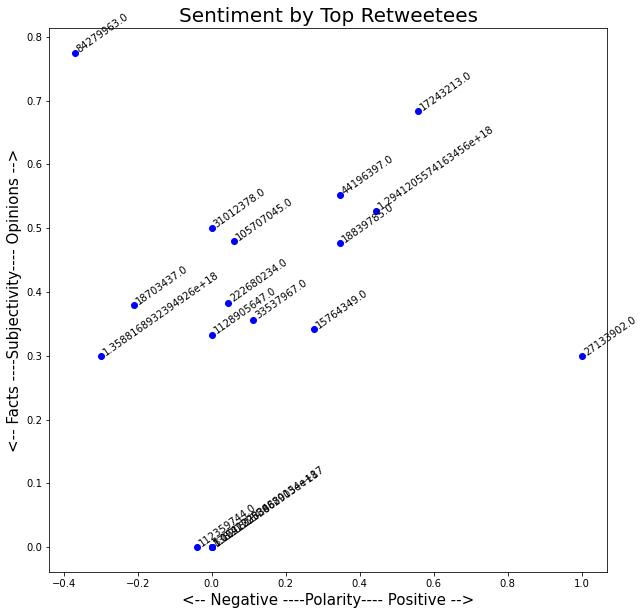

In [37]:
plt.rcParams['figure.figsize'] = [10, 10]

for index, user_id in enumerate(graphing_df.index):
    x = graphing_df.polarity.loc[user_id]
    y = graphing_df.subjectivity.loc[user_id]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, graphing_df['user_id'][index], fontsize=10, rotation=35)
#     plt.ylim(0, 1) 
#     plt.xlim(-1, 1) 

    
plt.title('Sentiment by Top Retweetees', fontsize=20)
plt.xlabel('<-- Negative ----Polarity---- Positive -->', fontsize=15)
plt.ylabel('<-- Facts ----Subjectivity---- Opinions -->', fontsize=15)

plt.show()